In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:

# Load the Titanic dataset
import pandas as pd
titanic = pd.read_csv("titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:

# Exploring missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

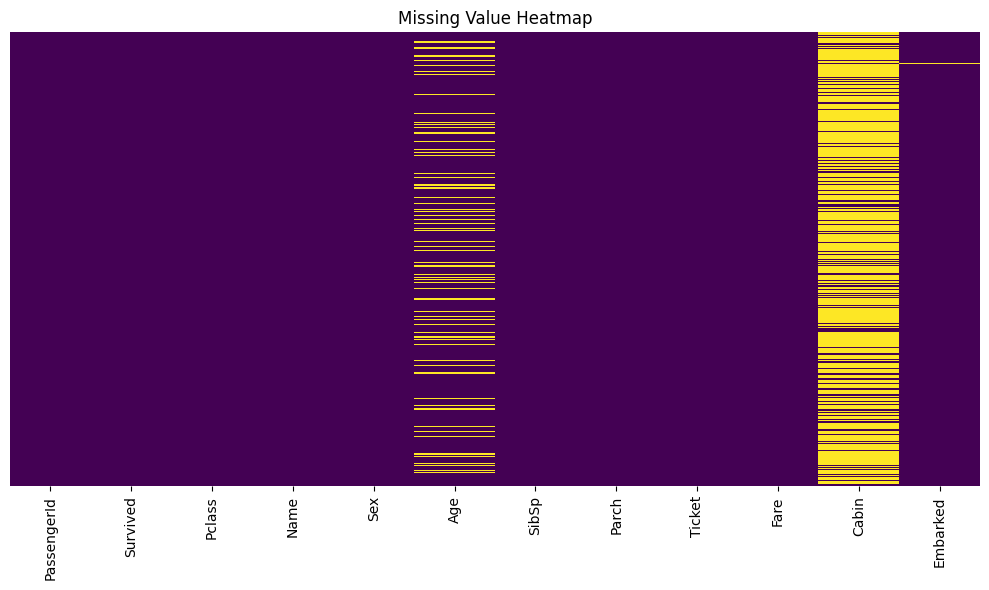

In [6]:

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.tight_layout()
plt.show()

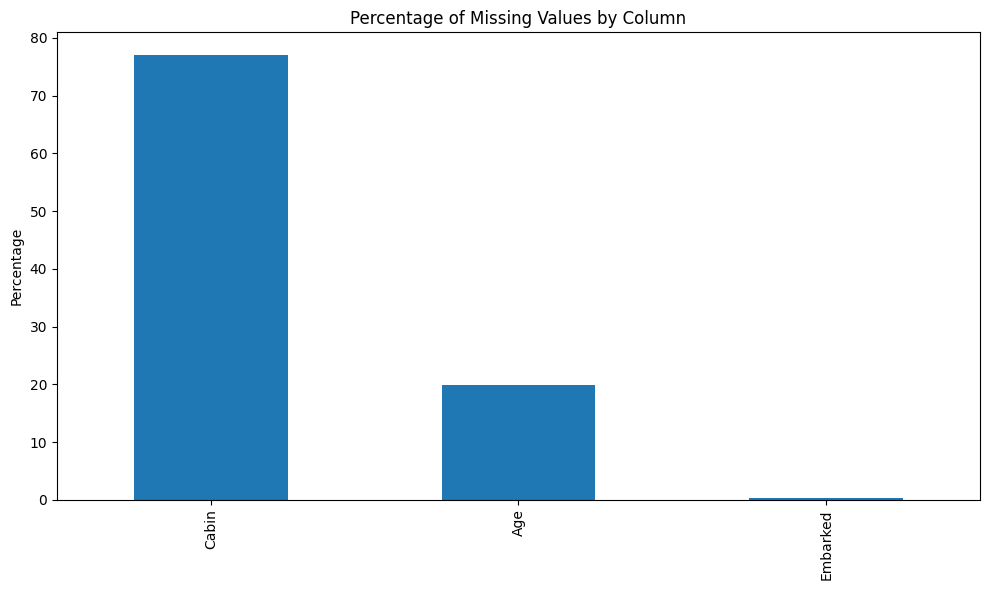

In [7]:
# Calculate percentage of missing values per column
missing_percentage = titanic.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate percentage of missing values per column
missing_percentage = titanic.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

# HANDLING MISSING VALUES

In [11]:
# 1. Deletion approach - not always recommended but useful for some columns
titanic_reduced = titanic.drop(['Cabin', 'Ticket'], axis=1)  # High missingness or less relevant
titanic_reduced

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [14]:
# 2. Simple imputation for Age (using median grouped by Pclass)
age_imputed = titanic_reduced.copy()
age_imputed['Age'] = age_imputed.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))
age_imputed['Age']


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [15]:

# 3. Create missing indicator for Age
age_imputed['Age_Missing'] = titanic_reduced['Age'].isnull().astype(int)
age_imputed['Age_Missing']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: Age_Missing, Length: 891, dtype: int64

In [ ]:
# 4. Mode imputation for categorical column (Embarked)
age_imputed['Embarked'] = age_imputed['Embarked'].fillna(age_imputed['Embarked'].mode()[0])

In [ ]:
# Verify imputation results
age_imputed.isnull().sum()

In [ ]:
# Visualize Age distribution before and after imputation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(titanic['Age'].dropna(), kde=True)
plt.title('Original Age Distribution')

In [ ]:
plt.subplot(1, 2, 2)
sns.histplot(age_imputed['Age'], kde=True)
plt.title('Age After Imputation')
plt.tight_layout()
plt.show()

# FEATURE SCALING

In [ ]:
# Select relevant columns and prepare a dataset for ML
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
X = age_imputed[features]
y = age_imputed[target]

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# 1. Standardization (z-score normalization)
scaler = StandardScaler()
# Never directly transform your entire dataset - only fit on training data
numeric_features = ['Age', 'Fare']
X_train_std = X_train.copy()
X_test_std = X_test.copy()

X_train_std[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_std[numeric_features] = scaler.transform(X_test[numeric_features])

In [ ]:
# 2. Min-Max Scaling (normalization)
min_max_scaler = MinMaxScaler()
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

X_train_norm[numeric_features] = min_max_scaler.fit_transform(X_train[numeric_features])
X_test_norm[numeric_features] = min_max_scaler.transform(X_test[numeric_features])

In [ ]:
# Visualize scaling effects
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.kdeplot(X_train['Fare'], label='Original')
plt.title('Original Fare Distribution')

In [ ]:
plt.subplot(1, 3, 2)
sns.kdeplot(X_train_std['Fare'], label='Standardized')
plt.title('Standardized Fare')

In [ ]:
plt.subplot(1, 3, 3)
sns.kdeplot(X_train_norm['Fare'], label='Normalized')
plt.title('Normalized Fare')
plt.tight_layout()
plt.show()

# ENCODING CATEGORICAL VARIABLES

In [ ]:
# 1. Label Encoding for ordinal features
label_encoder = LabelEncoder()
X_train_encoded = X_train_std.copy()
X_test_encoded = X_test_std.copy()

In [ ]:
# Apply label encoding for Sex column
X_train_encoded['Sex'] = label_encoder.fit_transform(X_train_encoded['Sex'])
X_test_encoded['Sex'] = label_encoder.transform(X_test_encoded['Sex'])

In [ ]:

# 2. One-Hot Encoding for nominal features
# Creating a one-hot encoder for 'Embarked'
embarked_ohe = OneHotEncoder(sparse_output=False, drop='first')
# Fit on training data
embarked_train_encoded = embarked_ohe.fit_transform(X_train_encoded[['Embarked']])
embarked_test_encoded = embarked_ohe.transform(X_test_encoded[['Embarked']])

In [ ]:
# Create dataframes with the encoded columns
embarked_train_df = pd.DataFrame(
    embarked_train_encoded,
    columns=[f'Embarked_{c}' for c in embarked_ohe.categories_[0][1:]],
    index=X_train_encoded.index
)
embarked_test_df = pd.DataFrame(
    embarked_test_encoded,
    columns=[f'Embarked_{c}' for c in embarked_ohe.categories_[0][1:]],
    index=X_test_encoded.index
)

In [ ]:

# Drop original Embarked column and join encoded columns
X_train_encoded = X_train_encoded.drop('Embarked', axis=1).join(embarked_train_df)
X_test_encoded = X_test_encoded.drop('Embarked', axis=1).join(embarked_test_df)


In [ ]:
# Compare encoding methods
print("Label Encoded 'Sex':")
print(X_train_encoded['Sex'].value_counts())

In [ ]:
print("\nOne-Hot Encoded 'Embarked':")
print(X_train_encoded.filter(like='Embarked').head())

# BUILDING PREPROCESSING PIPELINES

In [ ]:
# Define preprocessing for numerical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [ ]:
# Define preprocessing for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

In [ ]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('cat', categorical_transformer, ['Sex', 'Embarked'])
    ])


In [ ]:
# Create a full pipeline with preprocessing and model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [ ]:
# Reset to use raw features for complete pipeline demonstration
X = age_imputed[features]
y = age_imputed[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Train the pipeline
model_pipeline.fit(X_train, y_train)

In [ ]:
# Make predictions
predictions = model_pipeline.predict(X_test)

In [ ]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, predictions):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# ADVANCED: Custom Pipeline with Cross-Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a pipeline with multiple possible models
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [ ]:
# Define parameters to search
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10],
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
}

In [ ]:
# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5,
                          scoring='accuracy', n_jobs=-1)

In [ ]:
# Fit the grid search
grid_search.fit(X_train, y_train)


In [ ]:
# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

In [ ]:
# Evaluate on test set
test_score = grid_search.score(X_test, y_test)
print(f"Test set score with best parameters: {test_score:.4f}")

In [ ]:
# BONUS: Feature importance from the best model
if hasattr(grid_search.best_estimator_.named_steps['classifier'], 'feature_importances_'):
    # Get the preprocessor
    preprocessor = grid_search.best_estimator_.named_steps['preprocessor']

    # Get the feature names after transformation
    ohe_features = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(['Sex', 'Embarked'])
    feature_names = np.concatenate([numeric_features, ohe_features])

    # Get feature importances
    importances = grid_search.best_estimator_.named_steps['classifier'].feature_importances_

    # Create a DataFrame for visualization
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title('Feature Importances from Best Random Forest Model')
    plt.tight_layout()
    plt.show()

# Excercise

# Week 3 Day 1: Titanic Data Preprocessing & Modeling

In this exercise you'll reinforce:

- **Missing‑value exploration & visualization**  
- **Imputation strategies** (deletion, group‑median, mode, missing indicator)  
- **Feature scaling** (StandardScaler vs MinMaxScaler)  
- **Categorical encoding** (LabelEncoder, OneHotEncoder)  
- **Building end‑to‑end pipelines** with `ColumnTransformer` + `Pipeline`  
- **Model training & evaluation** (LogisticRegression, RandomForest)  
- **Hyperparameter tuning** via `GridSearchCV`  
- **Feature importance** extraction  

> **Instructions:**  
> 1. Don’t modify cells above the first `# TODO`.  
> 2. Replace each `# TODO` with your code.  
> 3. Run cells sequentially and verify each output.  
> 4. Wherever requested, add a brief comment on what you observe.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.1 Load dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)

# 1.2 How many missing values per column?
# TODO: Compute and display titanic.isnull().sum()

# 1.3 Visualize missingness with a heatmap
plt.figure(figsize=(10,6))
# TODO: use sns.heatmap(...) to show where data is missing

# 1.4 Percentage of missing values by column (bar plot)
# TODO: calculate percentage and plot as a bar chart


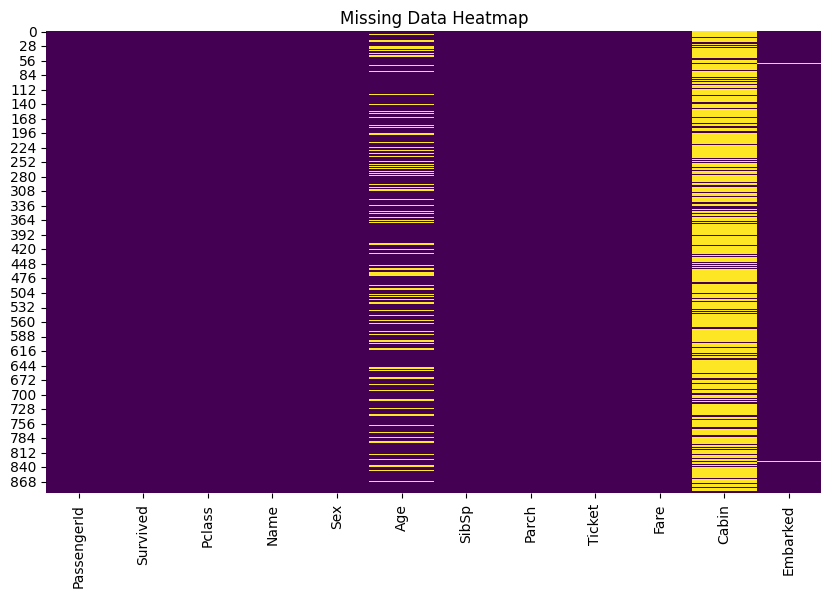

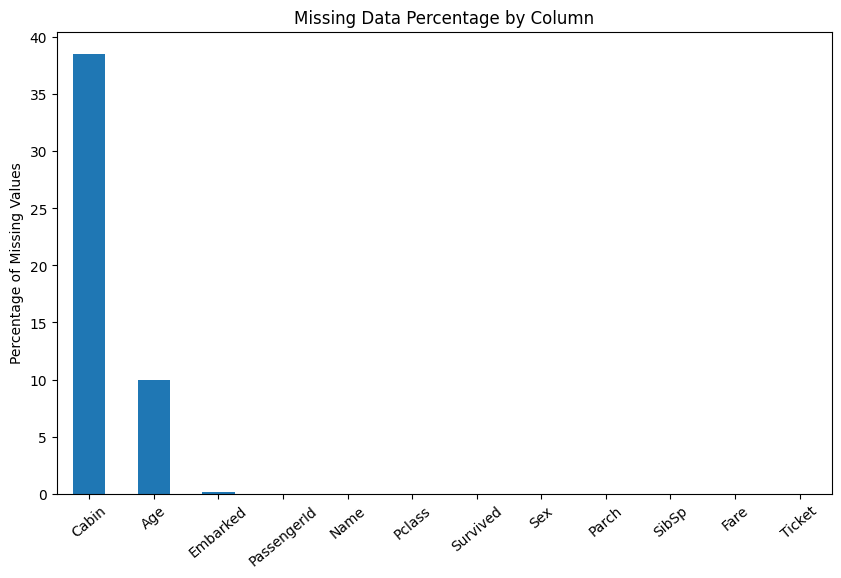

missing_counts
missing_percentage


In [ ]:
# Answer 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('titanic.csv')
df
missing_counts = titanic.isnull().sum()
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()
missing_percentage = (titanic.isnull().sum() / len(titanic)) * 50


plt.figure(figsize=(10, 6))
missing_percentage.sort_values(ascending=False).plot(kind='bar chart')
plt.ylabel("Percentage of Missing Values")
plt.title("Missing Data Percentage by Column")
plt.xticks(rotation=40)
plt.show()
print('missing_counts')
print("missing_percentage")


2- Handle Missing Values ---

In [ ]:
# Start from a copy
df = titanic.copy()

# 2.1 Drop columns with too many missing or irrelevant
# TODO: df = df.drop([...], axis=1)

# 2.2 Impute Age by median within each Pclass
# TODO: df['Age'] = df.groupby('Pclass')['Age'].transform(...)

# 2.3 Create Age_missing indicator column
# TODO: df['Age_Missing'] = ...

# 2.4 Impute Embarked with mode
# TODO: df['Embarked'] = df['Embarked'].fillna(...)

# 2.5 Verify no more missing values
# TODO: df.isnull().sum()


In [33]:
# Answer 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = titanic.copy()
df = df.drop(['Cabin', 'Ticket'], axis=1)
df['Age'] = df.groupby('Pclass')['Age'].transform()lambda x: x.fillna(x.median()))
df['Age_Missing'] = titanic['Age'].isnull().astype(int)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
print("Remaining missing values, df.isnull().sum()")

SyntaxError: unmatched ')' (2659499150.py, line 9)

3. Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

features = ['Age','Fare']
X = df[features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3.1 Standardization
std = StandardScaler()
# TODO: fit on X_train, transform both X_train and X_test

# 3.2 Min‑Max normalization
mms = MinMaxScaler()
# TODO: fit on X_train, transform both X_train and X_test

# 3.3 Plot distributions: original vs standardized vs normalized
plt.figure(figsize=(15,5))
# TODO: three subplots with sns.kdeplot for Fare in each dataset


In [ ]:
# Answer 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Age', 'Fare']
X = df[features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

mms = MinMaxScaler()
X_train_mms = mms.fit_transform(X_train)
X_test_mms = mms.transform(X_test)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.kdeplot(X_train['Fare'], label='Original Fare', fill=True)
plt.title('Original Fare Distribution')
plt.xlabel('Fare')


plt.subplot(1, 3, 2)
sns.kdeplot(X_train_std[:, 1], label='Standardized Fare', fill=True)
plt.title('Standardized Fare Distribution')
plt.xlabel('Fare (Standardized)')


plt.subplot(1, 3, 3)
sns.kdeplot(X_train_mms[:, 1], label='Normalized Fare', fill=True)
plt.title('Min-Max Normalized Fare Distribution')
plt.xlabel('Fare (Normalized)')

plt.tight_layout()
plt.show()


4. Encode Categorical Features

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

X_cat = df[['Sex','Embarked']]

# 4.1 Label‑encode Sex
le = LabelEncoder()
# TODO: X_cat['Sex_le'] = ...

# 4.2 One‑hot encode Embarked (drop first)
ohe = OneHotEncoder(sparse_output=False, drop='first')
# TODO: fit_transform Embarked and create a DataFrame with new columns

# Display your encoded features
# TODO: print head of resulting DataFrame


5. Build a Preprocessing + Model Pipeline



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 5.1 Define transformers
num_features = ['Age','Fare']
cat_features = ['Sex','Embarked']

num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

# 5.2 Create full pipeline with Logistic Regression
pipe = Pipeline([
    ('preproc', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

# 5.3 Split raw data and train
X_full = df[num_features + cat_features]
y_full = df['Survived']
X_tr, X_te, y_tr, y_te = train_test_split(X_full, y_full, test_size=0.3, random_state=42)

# TODO: fit pipe on X_tr, y_tr
# TODO: predict on X_te, compute accuracy and print classification_report


6. Hyperparameter Tuning with GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 6.1 Replace classifier in pipeline
tune_pipe = Pipeline([
    ('preproc', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])

# 6.2 Set up parameter grid
param_grid = {
    'clf__n_estimators': [50, 100],
    'clf__max_depth': [None, 10],
    'preproc__num__imputer__strategy': ['mean','median']
}

grid = GridSearchCV(tune_pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# TODO: fit grid on X_tr, y_tr
# TODO: print best_params_ and best_score_

# 6.3 Evaluate best estimator on test set
# TODO: grid.best_estimator_.score(X_te, y_te)

# 6.4 (Bonus) If RandomForest gives feature_importances_, extract and plot the top 10
# Hint: use .named_steps['preproc'] to get transformer and get_feature_names_out
